## Logistic Regression

<img src="./images/anime.png" width="500"/>

Вычислительный граф для модели логистической регрессии:

![caption](./images/graph.png)

Алгоритм SGD:

0) инициализируем веса  
1) сэмплируем batch_size примеров из выборки  
2) forward pass: вычисляем значения в узлах вычислительного графа  
3) backward pass: считаем градиенты $\frac{dL}{dw}$ Loss-функции по отношению к параметрам модели  
4) обновляем параметры:  
$$ w := w - lr*\frac{dL}{dw} $$  
5) Если не выполнен критерий завершения (превышено число итераций / параметры перестали существенно изменяться и т.п.), вернуться на шаг 1  

Реализуйте вычисление сигмоиды и постройте ее график в одномерном случае

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [7]:
def sigmoid(x):
    y = np.zeros_like(x)
    y[x >= 0] = 1 / (1 + np.exp(-1 * x[x >= 0]))
    y[x < 0] = np.exp(x[x < 0]) / (1 + np.exp(x[x < 0]))
    return y

<IPython.core.display.Javascript object>


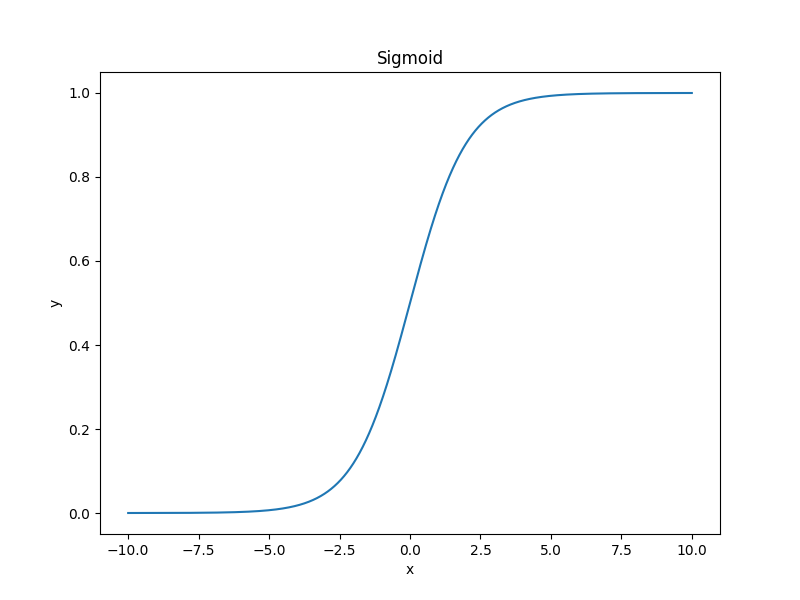

In [9]:
plt.figure(figsize=(8, 6))

x = np.linspace(-10, 10, 10001)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Реализуйте методы fit, predict, BCE, _init_weights в классе LogisticRegression.

In [123]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None
        
    @staticmethod
    def sigmoid(x):
        return sigmoid(x)
    
    @staticmethod
    def transform_one_hot(y):
        n_classes = int(max(y) + 1)
        one_hot = np.zeros(shape=(y.shape[0], n_classes))
        one_hot[tuple((np.arange(y.shape[0]), y))] = 1
        y = one_hot
        return y
    
    @staticmethod
    def loss(*args, **kwargs):
        return LogisticRegression.BCE(*args, **kwargs)
        
    @staticmethod
    def BCE(y, x):
        pred = np.maximum(x, 1e-5)
        
    
    @staticmethod
    def sample_batch(X_train, y_train, batch_size):
        if batch_size is not None:
            rand_idx = np.random.permutation(X_train.shape[0])[:batch_size]
            X, y = X_train[rand_idx, ...], y_train[rand_idx, ...]
        else:
            X, y = X_train, y_train
        return X, y
    
    def fit(self, 
            X_train, y_train, 
            iters=10000, 
            lr_base=0.01, 
            steps=4, 
            batch_size=None, 
            print_freq=20):
        
        """
        fit model to data
        
        params:
            X_train, y_train - training data. Shapes are:
                X_train: (N_samples, N_features),
                y_train: (N_samples, N_classes),
            iters - number of iterations to train
            lr_base - base learning rate
            steps - number of steps to drop the LR
            batch_size - batch size (== X.shape[0] if None)
            weight decay - lambda coefficient for L2 regularization
            print_freq - frequency of logging
        """
        
        self.N = X_train.shape[0]
        self.D = X_train.shape[1]
        self.O = y_train.shape[1]
        if  self.w is None or \
            self.b is None or \
            self.w.shape != (self.D, self.O) or \
            self.b.shape != (1., self.O):
            
            self._init_weights()
        
        lr = lr_base
        reduce_step = iters // (steps + 1)
        for i in range(iters):
            
            # sample data
            X, y = self.sample_batch(X_train, y_train, batch_size)
        
            sigma = sigmoid(X.dot(self.w) + self.b)
        
            loss = -np.mean(y * np.log(sigma))
        
            grad_w = X.T.dot(sigma - y) / X.shape[0]
            grad_b = np.mean(sigma - y, axis=0).reshape(1, -1)
            self.w = self.w - grad_w * lr
            self.b = self.b - grad_b * lr
            
            if i % print_freq == 0:
                print(f"iter: {i + 1}/{iters}, loss: {loss}")
                
                
            if i % reduce_step == 0 and steps > 0:
                lr = lr_base / 10 ** (i // reduce_step)
                steps -= 1

        return self
    
    def predict(self, X):
        return sigmoid(X.dot(self.w) + self.b)
    
    def _init_weights(self):
        self.b = np.zeros((1, self.O))
        self.w = np.random.uniform(-1, 1, size=(self.D, self.O))

Протестируйте обучение модели на простом примере

In [124]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0], [1], [1], [1]])

In [125]:
model = LogisticRegression().fit(X, y)

iter: 1/10000, loss: 0.48035091298218613
iter: 21/10000, loss: 0.4460264081617752
iter: 41/10000, loss: 0.4158734609989802
iter: 61/10000, loss: 0.3893069678815398
iter: 81/10000, loss: 0.36582322623426344
iter: 101/10000, loss: 0.344991777710895
iter: 121/10000, loss: 0.3264464026493624
iter: 141/10000, loss: 0.3098762534832037
iter: 161/10000, loss: 0.29501766133025953
iter: 181/10000, loss: 0.28164685385176047
iter: 201/10000, loss: 0.2695736436996227
iter: 221/10000, loss: 0.2586360479537455
iter: 241/10000, loss: 0.24869575076200912
iter: 261/10000, loss: 0.23963430350281723
iter: 281/10000, loss: 0.231349955812018
iter: 301/10000, loss: 0.22375501844241333
iter: 321/10000, loss: 0.21677367023860772
iter: 341/10000, loss: 0.2103401337556927
iter: 361/10000, loss: 0.2043971557885501
iter: 381/10000, loss: 0.19889473964495832
iter: 401/10000, loss: 0.19378908516125734
iter: 421/10000, loss: 0.189041700226336
iter: 441/10000, loss: 0.18461865406225192
iter: 461/10000, loss: 0.1804899

iter: 4881/10000, loss: 0.09222241509321089
iter: 4901/10000, loss: 0.09221921911740595
iter: 4921/10000, loss: 0.09221602344371381
iter: 4941/10000, loss: 0.09221282807204997
iter: 4961/10000, loss: 0.09220963300232952
iter: 4981/10000, loss: 0.09220643823446778
iter: 5001/10000, loss: 0.0922032437683805
iter: 5021/10000, loss: 0.09220004960398287
iter: 5041/10000, loss: 0.09219685574119021
iter: 5061/10000, loss: 0.09219366217991845
iter: 5081/10000, loss: 0.09219046892008273
iter: 5101/10000, loss: 0.0921872759615989
iter: 5121/10000, loss: 0.09218408330438255
iter: 5141/10000, loss: 0.0921808909483493
iter: 5161/10000, loss: 0.09217769889341475
iter: 5181/10000, loss: 0.09217450713949488
iter: 5201/10000, loss: 0.09217131568650515
iter: 5221/10000, loss: 0.09216812453436161
iter: 5241/10000, loss: 0.09216493368298001
iter: 5261/10000, loss: 0.09216174313227622
iter: 5281/10000, loss: 0.09215855288216608
iter: 5301/10000, loss: 0.09215536293256575
iter: 5321/10000, loss: 0.092152173

In [126]:
model.predict(X)

array([[0.46823603],
       [0.87293277],
       [0.81586468],
       [0.97188535]])

Протестируйте обучение модели на другом примере.

In [127]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0], [1], [1], [0]])

In [128]:
model = LogisticRegression().fit(X, y)

iter: 1/10000, loss: 0.40945305891431616
iter: 21/10000, loss: 0.40473992965113426
iter: 41/10000, loss: 0.40039084184890616
iter: 61/10000, loss: 0.3963762908718517
iter: 81/10000, loss: 0.39266924795660535
iter: 101/10000, loss: 0.38924495408469995
iter: 121/10000, loss: 0.386080728390985
iter: 141/10000, loss: 0.3831557909622628
iter: 161/10000, loss: 0.3804510995922634
iter: 181/10000, loss: 0.3779491998660617
iter: 201/10000, loss: 0.3756340878265729
iter: 221/10000, loss: 0.3734910844096605
iter: 241/10000, loss: 0.37150672080817626
iter: 261/10000, loss: 0.36966863392765603
iter: 281/10000, loss: 0.36796547111865274
iter: 301/10000, loss: 0.36638680340619345
iter: 321/10000, loss: 0.36492304648059165
iter: 341/10000, loss: 0.36356538876216027
iter: 361/10000, loss: 0.3623057259025787
iter: 381/10000, loss: 0.3611366011358751
iter: 401/10000, loss: 0.360051150940897
iter: 421/10000, loss: 0.35904305552388616
iter: 441/10000, loss: 0.35810649367383274
iter: 461/10000, loss: 0.3572

iter: 4841/10000, loss: 0.3449931682510424
iter: 4861/10000, loss: 0.3449931677563663
iter: 4881/10000, loss: 0.34499316729603613
iter: 4901/10000, loss: 0.3449931668700379
iter: 4921/10000, loss: 0.344993166478358
iter: 4941/10000, loss: 0.3449931661209823
iter: 4961/10000, loss: 0.3449931657978971
iter: 4981/10000, loss: 0.3449931655090883
iter: 5001/10000, loss: 0.34499316525454227
iter: 5021/10000, loss: 0.344993165034245
iter: 5041/10000, loss: 0.34499316484818265
iter: 5061/10000, loss: 0.34499316469634145
iter: 5081/10000, loss: 0.3449931645787075
iter: 5101/10000, loss: 0.3449931644952669
iter: 5121/10000, loss: 0.34499316444600586
iter: 5141/10000, loss: 0.34499316443091066
iter: 5161/10000, loss: 0.3449931644499673
iter: 5181/10000, loss: 0.34499316450316214
iter: 5201/10000, loss: 0.3449931645904812
iter: 5221/10000, loss: 0.34499316471191077
iter: 5241/10000, loss: 0.34499316486743714
iter: 5261/10000, loss: 0.34499316505704625
iter: 5281/10000, loss: 0.3449931652807246
ite

iter: 9901/10000, loss: 0.3449932307995755
iter: 9921/10000, loss: 0.34499323101089163
iter: 9941/10000, loss: 0.3449932312225406
iter: 9961/10000, loss: 0.34499323143452265
iter: 9981/10000, loss: 0.3449932316468376


In [129]:
model.predict(X)

array([[0.51446348],
       [0.47616271],
       [0.52836007],
       [0.49006896]])

Каким получается качество? Почему так происходит?

## Боевое применение 

Протестируйте написанную вами модель логистической регрессии на датасете для классификации ирисов. Подробнее об этом датасете: https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0

In [130]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Разделим данные на обучающую и валидационную выборку. Сконвертируем y в формат one_hot_encoding и обучим модель.

In [131]:
X, y = load_iris(return_X_y=True)
# make y one-hot encoded:
y = LogisticRegression.transform_one_hot(y)
print(X.shape, y.shape, y.min(), y.max())
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.25)

(150, 4) (150, 3) 0.0 1.0


In [132]:
model = LogisticRegression().fit(X_train, y_train, lr_base=0.1, batch_size=32)

iter: 1/10000, loss: 1.0990826694411042
iter: 21/10000, loss: 0.2258918582600887
iter: 41/10000, loss: 0.26155299485684064
iter: 61/10000, loss: 0.15799211608270716
iter: 81/10000, loss: 0.12239886313398866
iter: 101/10000, loss: 0.16356173240273755
iter: 121/10000, loss: 0.1422128467796168
iter: 141/10000, loss: 0.1485581093620839
iter: 161/10000, loss: 0.11999618687586155
iter: 181/10000, loss: 0.1717571735531176
iter: 201/10000, loss: 0.12961258371240944
iter: 221/10000, loss: 0.15920148514755156
iter: 241/10000, loss: 0.1254249022203441
iter: 261/10000, loss: 0.10129798565346888
iter: 281/10000, loss: 0.1088135319971797
iter: 301/10000, loss: 0.10195083129530595
iter: 321/10000, loss: 0.14624129222030613
iter: 341/10000, loss: 0.11991944531844223
iter: 361/10000, loss: 0.15873292056683755
iter: 381/10000, loss: 0.1469481584780007
iter: 401/10000, loss: 0.11409373636181408
iter: 421/10000, loss: 0.11647633887142635
iter: 441/10000, loss: 0.12061584680258386
iter: 461/10000, loss: 0.

iter: 5461/10000, loss: 0.12968182783998194
iter: 5481/10000, loss: 0.18642319122041204
iter: 5501/10000, loss: 0.1433541627277121
iter: 5521/10000, loss: 0.10766169106318568
iter: 5541/10000, loss: 0.12043266582068224
iter: 5561/10000, loss: 0.1240200468903311
iter: 5581/10000, loss: 0.1496356405355821
iter: 5601/10000, loss: 0.10658639703234472
iter: 5621/10000, loss: 0.09366285397632963
iter: 5641/10000, loss: 0.10989580123528743
iter: 5661/10000, loss: 0.10771464592012871
iter: 5681/10000, loss: 0.07780832038332124
iter: 5701/10000, loss: 0.08323263469887014
iter: 5721/10000, loss: 0.09546506091200035
iter: 5741/10000, loss: 0.12362732928963667
iter: 5761/10000, loss: 0.09407410095072628
iter: 5781/10000, loss: 0.1116603913360507
iter: 5801/10000, loss: 0.08598017675100128
iter: 5821/10000, loss: 0.0869753452570207
iter: 5841/10000, loss: 0.13554108953544317
iter: 5861/10000, loss: 0.0795921587923401
iter: 5881/10000, loss: 0.11629007797503044
iter: 5901/10000, loss: 0.087097013754

iter: 9181/10000, loss: 0.12436612444509747
iter: 9201/10000, loss: 0.14259451453495314
iter: 9221/10000, loss: 0.09525776789216484
iter: 9241/10000, loss: 0.06750377427021369
iter: 9261/10000, loss: 0.13651183077316809
iter: 9281/10000, loss: 0.07322959169923278
iter: 9301/10000, loss: 0.13161034012820547
iter: 9321/10000, loss: 0.09687585350508836
iter: 9341/10000, loss: 0.09779442349764471
iter: 9361/10000, loss: 0.1168030426671441
iter: 9381/10000, loss: 0.10933755095022517
iter: 9401/10000, loss: 0.1304658234916376
iter: 9421/10000, loss: 0.15388811827513857
iter: 9441/10000, loss: 0.14130022493857794
iter: 9461/10000, loss: 0.10689601542328153
iter: 9481/10000, loss: 0.07092846303818497
iter: 9501/10000, loss: 0.06544198290684572
iter: 9521/10000, loss: 0.09012283415917206
iter: 9541/10000, loss: 0.07936932595094466
iter: 9561/10000, loss: 0.10803641971314581
iter: 9581/10000, loss: 0.11246024067591238
iter: 9601/10000, loss: 0.12364565819553579
iter: 9621/10000, loss: 0.14388758

Подсчитаем точность. Постарайтесь сделать так, чтобы точность была не ниже 85 %. Возможно понадобится покрутить параметры модели (или починить баги :)

In [133]:
pred_val = model.predict(X_val).argmax(axis=1)
gt_val = y_val.argmax(axis=1)
acc = 1 - (pred_val != gt_val).sum() / y_val.shape[0]
print("model accuracy:", acc)

model accuracy: 0.9473684210526316


## Визуализация 

Визуализируйте разделяющую плоскость. Тестируйте на двумерных синтетических данных для простоты дебага и визуализации.

In [134]:
np.random.seed(0)

# create some dummy data
C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.concatenate([np.ones(200, dtype=np.int32), np.zeros(200, dtype=np.int32)])[:, None]

# plot_decision_boundary
model = LogisticRegression().fit(X, y, lr_base=0.01)


iter: 1/10000, loss: 0.28482167673127984
iter: 21/10000, loss: 0.23307814000322744
iter: 41/10000, loss: 0.2074515766094624
iter: 61/10000, loss: 0.1933314527538007
iter: 81/10000, loss: 0.18495983667280305
iter: 101/10000, loss: 0.17969465436157148
iter: 121/10000, loss: 0.1761939455225879
iter: 141/10000, loss: 0.17372985487648265
iter: 161/10000, loss: 0.17189082257964358
iter: 181/10000, loss: 0.17043791881790804
iter: 201/10000, loss: 0.16923001452886977
iter: 221/10000, loss: 0.16818269075560202
iter: 241/10000, loss: 0.16724488237669216
iter: 261/10000, loss: 0.1663853141132131
iter: 281/10000, loss: 0.16558452201891824
iter: 301/10000, loss: 0.16483012600593022
iter: 321/10000, loss: 0.16411401730370645
iter: 341/10000, loss: 0.16343068129870153
iter: 361/10000, loss: 0.16277619578625174
iter: 381/10000, loss: 0.16214763157948364
iter: 401/10000, loss: 0.16154269290738965
iter: 421/10000, loss: 0.16095950071536094
iter: 441/10000, loss: 0.16039646112822148
iter: 461/10000, loss

iter: 3781/10000, loss: 0.1373239295272989
iter: 3801/10000, loss: 0.13730916803662402
iter: 3821/10000, loss: 0.13729442022305022
iter: 3841/10000, loss: 0.13727968606722096
iter: 3861/10000, loss: 0.13726496554982137
iter: 3881/10000, loss: 0.1372502586515774
iter: 3901/10000, loss: 0.1372355653532558
iter: 3921/10000, loss: 0.137220885635664
iter: 3941/10000, loss: 0.13720621947964998
iter: 3961/10000, loss: 0.13719156686610157
iter: 3981/10000, loss: 0.13717692777594706
iter: 4001/10000, loss: 0.1371623021901542
iter: 4021/10000, loss: 0.1371601826119634
iter: 4041/10000, loss: 0.1371587210034104
iter: 4061/10000, loss: 0.13715725952971006
iter: 4081/10000, loss: 0.13715579819084317
iter: 4101/10000, loss: 0.13715433698679028
iter: 4121/10000, loss: 0.13715287591753242
iter: 4141/10000, loss: 0.13715141498305028
iter: 4161/10000, loss: 0.1371499541833245
iter: 4181/10000, loss: 0.13714849351833608
iter: 4201/10000, loss: 0.1371470329880656
iter: 4221/10000, loss: 0.1371455725924939

iter: 7601/10000, loss: 0.13700448633521126
iter: 7621/10000, loss: 0.13700434160122277
iter: 7641/10000, loss: 0.13700419686856274
iter: 7661/10000, loss: 0.13700405213723116
iter: 7681/10000, loss: 0.13700390740722804
iter: 7701/10000, loss: 0.13700376267855327
iter: 7721/10000, loss: 0.1370036179512069
iter: 7741/10000, loss: 0.13700347322518885
iter: 7761/10000, loss: 0.13700332850049912
iter: 7781/10000, loss: 0.13700318377713772
iter: 7801/10000, loss: 0.13700303905510453
iter: 7821/10000, loss: 0.13700289433439972
iter: 7841/10000, loss: 0.13700274961502312
iter: 7861/10000, loss: 0.13700260489697483
iter: 7881/10000, loss: 0.13700246018025466
iter: 7901/10000, loss: 0.13700231546486272
iter: 7921/10000, loss: 0.13700217075079898
iter: 7941/10000, loss: 0.1370020260380634
iter: 7961/10000, loss: 0.13700188132665592
iter: 7981/10000, loss: 0.1370017366165766
iter: 8001/10000, loss: 0.13700159190782535
iter: 8021/10000, loss: 0.13700144720040217
iter: 8041/10000, loss: 0.137001302

<IPython.core.display.Javascript object>


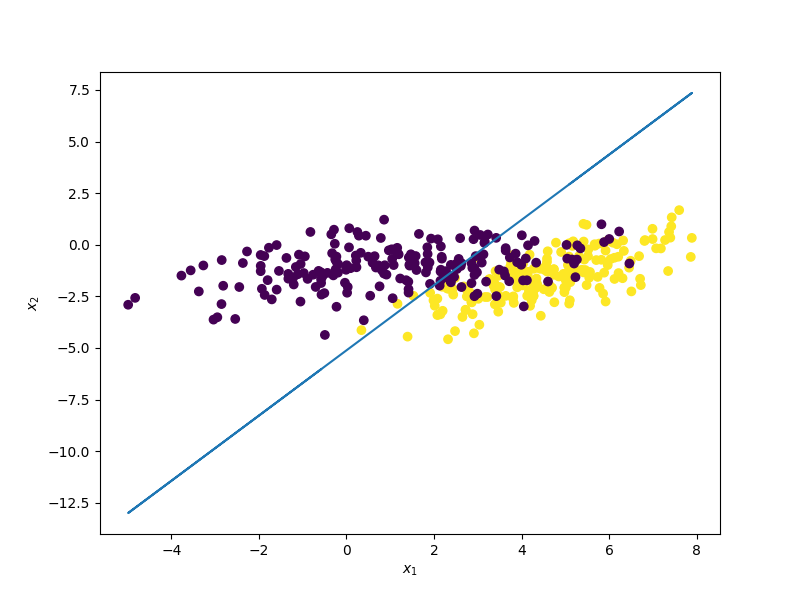

In [143]:
#your code here
xticks = X[:, 0]
yticks = -(xticks * model.w[0].ravel() + model.b.ravel())/model.w[1].ravel()

plt.figure(figsize=(8, 6))

plt.scatter(X[:,0], X[:,1], c=y[:, 0])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.plot(xticks, yticks)

Визуализируем также с помощью трехмерного графика как изменяются предсказания модели в зависимости от точки пространства.

<IPython.core.display.Javascript object>


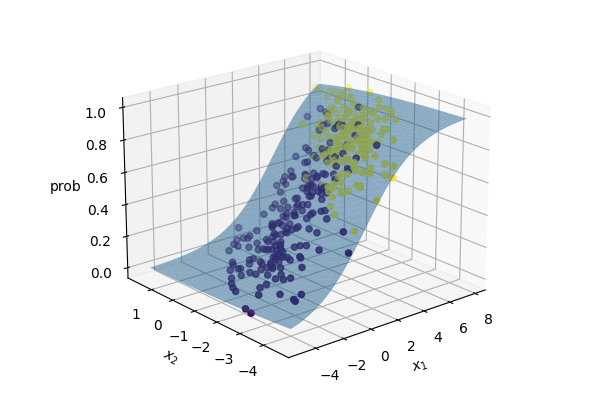

Text(0.5, 0, 'prob')

In [135]:
xticks = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yticks = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

pred = model.sigmoid(model.w[0, 0]*X[:, 0] + model.w[1, 0]*X[:, 1] + model.b[0, 0])

xxx, yyy = np.meshgrid(xticks, yticks)
zzz = model.sigmoid(model.w[0, 0]*xxx + model.w[1, 0]*yyy + model.b[0, 0])
zticks = model.sigmoid(model.w[0, 0]*xxx + model.w[1, 0]*yyy + model.b[0, 0])


fig = plt.figure(figsize=(6, 4))
ax = Axes3D(fig, azim=-130, elev=20)

ax.scatter(X[:,0], X[:,1], pred, c=y[:, 0])
ax.plot_surface(xxx, yyy, zzz, alpha=0.5)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("prob")